# Forward and Back-propagation- Math Simplified 

Author: DebPanigrahi (https://github.com/DebPanigrahi/Machine-Learning/blob/master/back_prop.ipynb)  
Revise: Chul Min Yeum (cmyeum@uwaterloo.ca) (Mar 27, 2024)

There is already a lot of coverage on this topic on the internet, but some skip the math due to wide audience, others just complicate it using complex mathematical notations and words. In order to drive the NN one may not care what's under the hood, but to do more than that you may need to know what's under the hood (sometimes down to the components) without the jargons. Below I derive some basic math to compute the updates needed for back-propagation. The notations are influenced by fast.ai (Deep Learning) program at USF and Deep Learning specialization course in Coursera. Hope you find it helpful. After all the functions are linear with few more variables, how hard can it get? All we need is familiarity with neural network and high-school math. 

Forward propagation is nothing but applying a series of functions on an input vector $X$ with resulting output of each is also a vector. For a neural network generating a logical output between 0 and 1 with 1 hidden layer the function can be represented as $\sigma(f_2(g_1(f_1(X)))$. More generally for a network with $L-1$ hidden layers; $g_L(f_L(...g_l(f_l(..f_1(X)..))...))$. And activation at layer $l$ can be represented as $A_l = g_l(f_l(A_{l-1}))$ assuming its a linear layer followed by a non-linear activation function. Chain rule states that the derivative of $g_l$ with respect to $A_{l-1}$ can be represented as a function of derivative of $g_l$ with respect to $f_l$:  $ \frac{\partial g_l }{\partial A_{l-1}} = \frac{\partial f_l }{\partial A_{l-1}} \cdot \frac{\partial g_l }{\partial f_l}$. And we say error $\frac{\partial g_l }{\partial f_l}$ in layer $l$ is now "back-propagated" to layer $l-1$.

Below is a neural network with 2 adjacent (linear+activation) layers $l-1$ and $l$ with $m$ and $n$ neurons respectively. Then the forward propagation through linear layer is $Z_l=W_l\cdot A_{l-1}+B_l$ ; where $W_l$ is an $n\times m$ dimensional weight matrix mapping a $m$ dimensional vector $A_{l-1}$ to $n$ dimensional vector $Z_l$ with bias $B_l$. And through the activation layer it is $g_l(Z_l)$ which is a non-linear function like relu. 

$$ W = {\begin{bmatrix}
    w_{11} & ... & w_{1m}\\
    \vdots & \ddots & \vdots \\
    w_{n1} & ... & w_{nm}
\end{bmatrix}}_{\text{ }n\times m}\;\;\; A_{l-1} = {\begin{bmatrix}
    a_{(l-1)1} \\
    \vdots\\
    a_{(l-1)m}
\end{bmatrix}}_{\text{ }m\times 1} \;\;\; b ={\begin{bmatrix}
    b_{l1}  \\
    \vdots  \\
    b_{ln}
\end{bmatrix}}_{\text{ }n\times 1}\;\;\;
Z ={\begin{bmatrix}
    z_{l1}  \\
    \vdots  \\
    z_{ln}
\end{bmatrix}}_{\text{ }n\times 1}\tag{1}$$

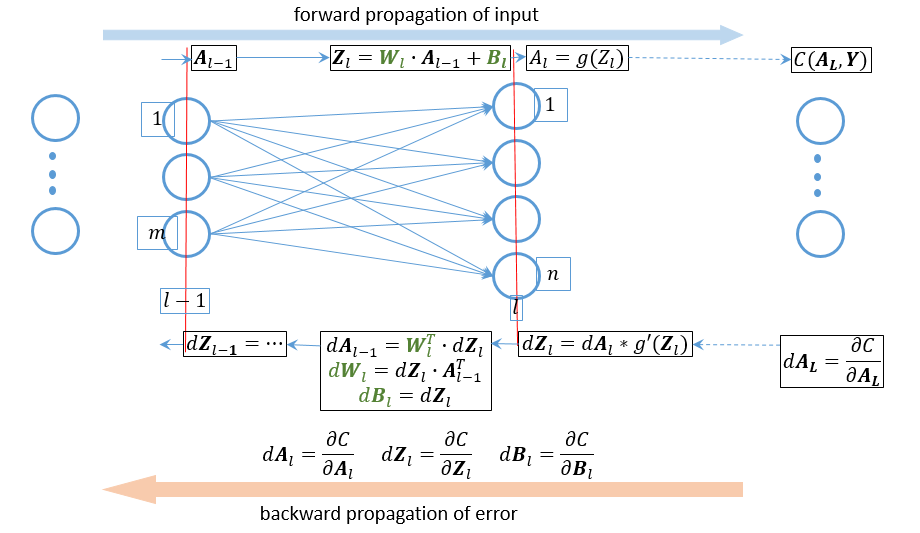



To minimize cost by doing backward propagation we need to first adjust $A_L$ in the last layer in the direction of decreasing cost function $\mathcal{C}$ : $A_L = A_L-\alpha \frac{\partial \mathcal{C} }{\partial A_L}$, where $\alpha$ is a positive "learning rate". Since $A_L$ can be a vector (for example in multi-label classifications) $dA_L=\frac{\partial \mathcal{C} }{\partial A_L}$ has the same dimension as $A_L$, as it can change in as many ways as the number of elements in $A_L$. $dA_L$ can be propagated backwards through activation layers and linear layers. Then **we calculate the error in the cost function with respect to each of the parameters (weights/biases) and inputs to a given layer (which are outputs of previous layer).** Now we can try to find generic equations for backward propagation through activation layer in layer $l$ using chain rule. The trick is to keep it simple and not apply chain rule until we break the equation into smallest dimension possible. 

$$ dZ_l = \frac{\partial \mathcal{C} }{\partial Z_l} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}}  \\
    ...  \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}}
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial a_{l1}} \frac{\partial a_{l1}}{\partial z_{l1}} \\
    ...  \\
    \frac{\partial \mathcal{C} }{\partial a_{ln}} \frac{\partial a_{l1}}{\partial z_{ln}} 
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial a_{l1}} \frac{\partial g_l(z_{l1}) }{\partial z_{l1}} \\
    ...  \\
    \frac{\partial \mathcal{C} }{\partial a_{ln}} \frac{\partial g_l(z_{ln}) }{\partial z_{ln}}
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial a_{l1}} \\
    ...  \\
    \frac{\partial \mathcal{C} }{\partial a_{ln}} 
\end{bmatrix} \odot 
\begin{bmatrix}
    \frac{\partial g_l(z_{l1}) }{\partial z_{l1}} \\
    ...  \\
    \frac{\partial g_l(z_{ln}) }{\partial z_{ln}}
\end{bmatrix} = 
dA_l \odot g_l'(Z_l)
$$

($\odot$: elementwise multiplication)

Next we get derivative of parameters $W_l$ and $B_l$. $\mathcal{C}$ can change with respect to each element of $W_l$, so it would also be an $n\times m$ matrix as shown below. 

$$
dW_l = \frac{\partial \mathcal{C} }{\partial W_l} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial w_{11}} & \dots & \frac{\partial \mathcal{C} }{\partial w_{1m}} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial \mathcal{C} }{\partial w_{n1}} & \dots & \frac{\partial \mathcal{C} }{\partial w_{nm}} \\
\end{bmatrix} =
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}} \frac{\partial z_{l1} }{\partial w_{11}} & \dots & \frac{\partial \mathcal{C} }{\partial z_{l1}} \frac{\partial z_{l1} }{\partial w_{1m}} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}} \frac{\partial z_{ln} }{\partial w_{n1}} & \dots & \frac{\partial \mathcal{C} }{\partial z_{ln}} \frac{\partial z_{ln} }{\partial w_{nm}} 
\end{bmatrix} 
$$

(applying chain rule to scalers $\frac{\partial \mathcal{C} }{\partial w_{ij}} = \frac{\partial \mathcal{C} }{\partial z_{li}} \frac{\partial z_{li} }{\partial w_{ij}}$ )
$$
= \begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}} a_{(l-1)1} & ... & \frac{\partial \mathcal{C} }{\partial z_{l1}} a_{(l-1)m} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}} a_{(l-1)1} & ... & \frac{\partial \mathcal{C} }{\partial z_{ln}} a_{(l-1)m}
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}} \\
    \vdots \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}}
\end{bmatrix} \cdot
\begin{bmatrix}
a_{(l-1)1} & \dots & a_{(l-1)m}
\end{bmatrix} = 
dZ_l \cdot {A_{l-1}}^T
$$

(forward propagation: $ z_{li} = \sum_{j} { w_{ij}  a_{(l-1)j}} + b_{li}$)

Similarly, 

$$dB_l = \frac{\partial \mathcal{C} }{\partial B_l} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial b_{l1}} \\
    \vdots \\
    \frac{\partial \mathcal{C} }{\partial b_{ln}}
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}} \frac{\partial z_{l1} }{\partial b_{l1}} \\
    \vdots \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}} \frac{\partial z_{ln} }{\partial b_{ln}} \\
\end{bmatrix} = 
\begin{bmatrix}
    \frac{\partial \mathcal{C} }{\partial z_{l1}} \\
    \vdots \\
    \frac{\partial \mathcal{C} }{\partial z_{ln}} \\
\end{bmatrix} = dZ_l $$

(using the fact that $\frac{\partial z_{li} }{\partial b_{li}} = 1$)

After we find the adjustments to input parameters we can back-propagate the error $dZ_l$ to find $dA_{l-1}$. To get the derivative for $A_{l-1}$ we take the chain rule first since each element in $Z_l$ is dependent on all elements in $A_{l-1}$.  
$$
dA_{l-1} = \frac{\partial \mathcal{C} }{\partial A_{l-1}} =
\frac{\partial Z_l }{\partial A_{l-1}} \cdot \frac{\partial \mathcal{C} }{\partial Z_l} =
\frac{\partial Z_l }{\partial A_{l-1}} \cdot dZ_l
$$

Through back propagation we already have $dZ_l$. To get $\frac{\partial Z_l }{\partial A_{l-1}}$ we note that each of $n$ elements in $Z_l$ can change with respect to $m$ elements in $A_{l-1}$. 

$$\frac{\partial Z_l }{\partial A_{l-1}} = 
\begin{bmatrix}
    \frac{\partial z_{l1} }{\partial a_{(l-1)1}} & \dots & \frac{\partial z_{ln} }{\partial a_{(l-1)1}}\\
    \vdots & \ddots & \vdots \\
    \frac{\partial z_{l1} }{\partial a_{(l-1)m}} & \dots & \frac{\partial z_{ln} }{\partial a_{(l-1)m}}
\end{bmatrix} = 
\begin{bmatrix}
    w_{11} & ... & w_{n1}\\
    \vdots & \ddots & \vdots \\
    w_{1m} & ... & w_{nm}
\end{bmatrix} = {W_{l}}^T
$$

(forward propagation: $ z_{li} = \sum_{j} { w_{ij}  a_{(l-1)j}} + b_{li}$)

Thus $dA_{l-1} = {W_{l}}^T \cdot dZ_l$ can be propagated to calculate derivatives in previous layer $l-1$. 

Now, we can take the chain rule for obtaining $dZ_{l-1}$. 

$$
dZ_{l-1} = \frac{\partial \mathcal{C} }{\partial Z_{l-1}} =
\frac{\partial A_{l-1} }{\partial Z_{l-1}} \cdot \frac{\partial \mathcal{C} }{\partial A_{l-1}} =  \frac{\partial A_{l-1} }{\partial Z_{l-1}} \cdot d{A_{l-1}} =  d{A_{l-1}} \odot g_{l-1}'(Z_{l-1})
$$


#### Back-prop for Multiple Observations

We now know how to derive the updates to $W_l$, $B_l$ and $A_{l-1}$ for one observation. For multiple observations, we can either process 1 example at a time to get the gradients, update parameters and then apply the new parameters on the next example and so on. Or we can process a small batch of size N and then take the average of the gradients across all parameters and update the weights and biases. The second method is preferred as deep learning frameworks support vectorization where the above matrix operations can happen simultaneously. 

$A_{l-1}$ now is an $m\times N$ matrix and $Z_l$ is an $n\times N$ matrix as shown below. The superscript $(i)$ denotes $i^{th}$ observation. 

$$
A_{l-1} = \begin{bmatrix} A_{l-1}^{(1)} & \dots & A_{l-1}^{(N)} \end{bmatrix} = 
\begin{bmatrix}
    a_{(l-1)1}^{(1)} & \dots & a_{(l-1)1}^{(N)} \\
    \vdots & \ddots & \vdots \\
    a_{(l-1)m}^{(1)} & \dots & a_{(l-1)m}^{(N)}
\end{bmatrix} \;\;\;\;\;\; Z_{l} = \begin{bmatrix} Z_{l}^{(1)} & \dots & Z_{l}^{(N)} \end{bmatrix} = 
\begin{bmatrix}
    z_{l1}^{(1)} & \dots & z_{l1}^{(N)} \\ 
    \vdots & \ddots & \vdots \\ 
    z_{ln}^{(1)} & \dots & z_{ln}^{(N)} 
\end{bmatrix}
$$

Then the forward propagation equation remains the same with matrices stacked $N$ times for each example: $Z_{l\text{ }(n\times N)}=W_{l\text { } (n\times m)}\cdot A_{l-1\text { }(m\times N)}+B_{l \text { } (n\times 1)}$. $B_l$ is broadcast across all observations.

The backward propagation equation becomes: 

$$dW_l = \frac{1}{N}(dW_l^{(1)} + \dots + dW_l^{(N)})  = \frac{1}{N}(dZ_l^{(1)} \cdot {A_{l-1}^{(1)}}^T + \dots + dZ_l^{(N)} \cdot {A_{l-1}^{(N)}}^T) $$

(expanding the above and adding the matrices we get:)

$$ = \frac{1}{N}
\begin{bmatrix}
    (dz_{l1}^{(1)})(a_{(l-1)1}^{(1)})+\dots+(dz_{l1}^{(N)})(a_{(l-1)1}^{(N)}) & ... & (dz_{l1}^{(1)})(a_{(l-1)m}^{(1)})+\dots+(dz_{l1}^{(N)})(a_{(l-1)m}^{(N)}) \\
    \vdots & \ddots & \vdots \\
    (dz_{ln}^{(1)})(a_{(l-1)1}^{(1)})+\dots+(dz_{ln}^{(N)})(a_{(l-1)1}^{(N)}) & ... & (dz_{ln}^{(1)})(a_{(l-1)m}^{(1)})+\dots+(dz_{ln}^{(N)})(a_{(l-1)m}^{(N)})
\end{bmatrix} 
$$
...

$$
= \frac{1}{N}
\begin{bmatrix}
    dz_{l1}^{(1)} & ... & dz_{l1}^{(N)} \\
    \vdots & \ddots & \vdots \\
    dz_{ln}^{(1)} & ... & dz_{ln}^{(N)}
\end{bmatrix} \cdot
\begin{bmatrix}
    a_{(l-1)1}^{(1)} & ... & a_{(l-1)m}^{(1)} \\
    \vdots & \ddots & \vdots \\
    a_{(l-1)1}^{(N)} & ... & a_{(l-1)m}^{(N)}
\end{bmatrix} = \frac{1}{N}dZ_l \cdot A_{l-1}^T
$$

Similarly, 
$$dB_l = \frac{1}{N}(dZ_l^{(1)}+\dots+dZ_l^{(N)})$$

The activations for each observation in the batch and their derivatives use the current weights and biases. Thus, 

$$
dA_{l-1} =
\begin{bmatrix}
dA_{l-1}^{(1)} \\
\vdots \\
dA_{l-1}^{(N)}
\end{bmatrix} =  
\begin{bmatrix}
W^T \cdot dZ_l^{(1)} \\
\vdots \\
W^T \cdot dZ_l^{(N)}
\end{bmatrix} = 
W^T \cdot \begin{bmatrix}
dZ_l^{(1)} \\
\vdots \\
dZ_l^{(N)}
\end{bmatrix}
= W^T \cdot dZ_l \tag {10}
$$

Here we have derived the equations needed for back-propagation. For other layers like pooling or batch-normalization layers a similar strategy can be adopted to derive the equations. Functions like relu or pooling are theoretically not differentiable at some of the input conditions. But for implementation we can assume that they are and they don't affect the performance due to low probability of such points.    

## Backpropagating Cross-Entropy Loss

Referance: https://towardsdatascience.com/deriving-backpropagation-with-cross-entropy-loss-d24811edeaf9 

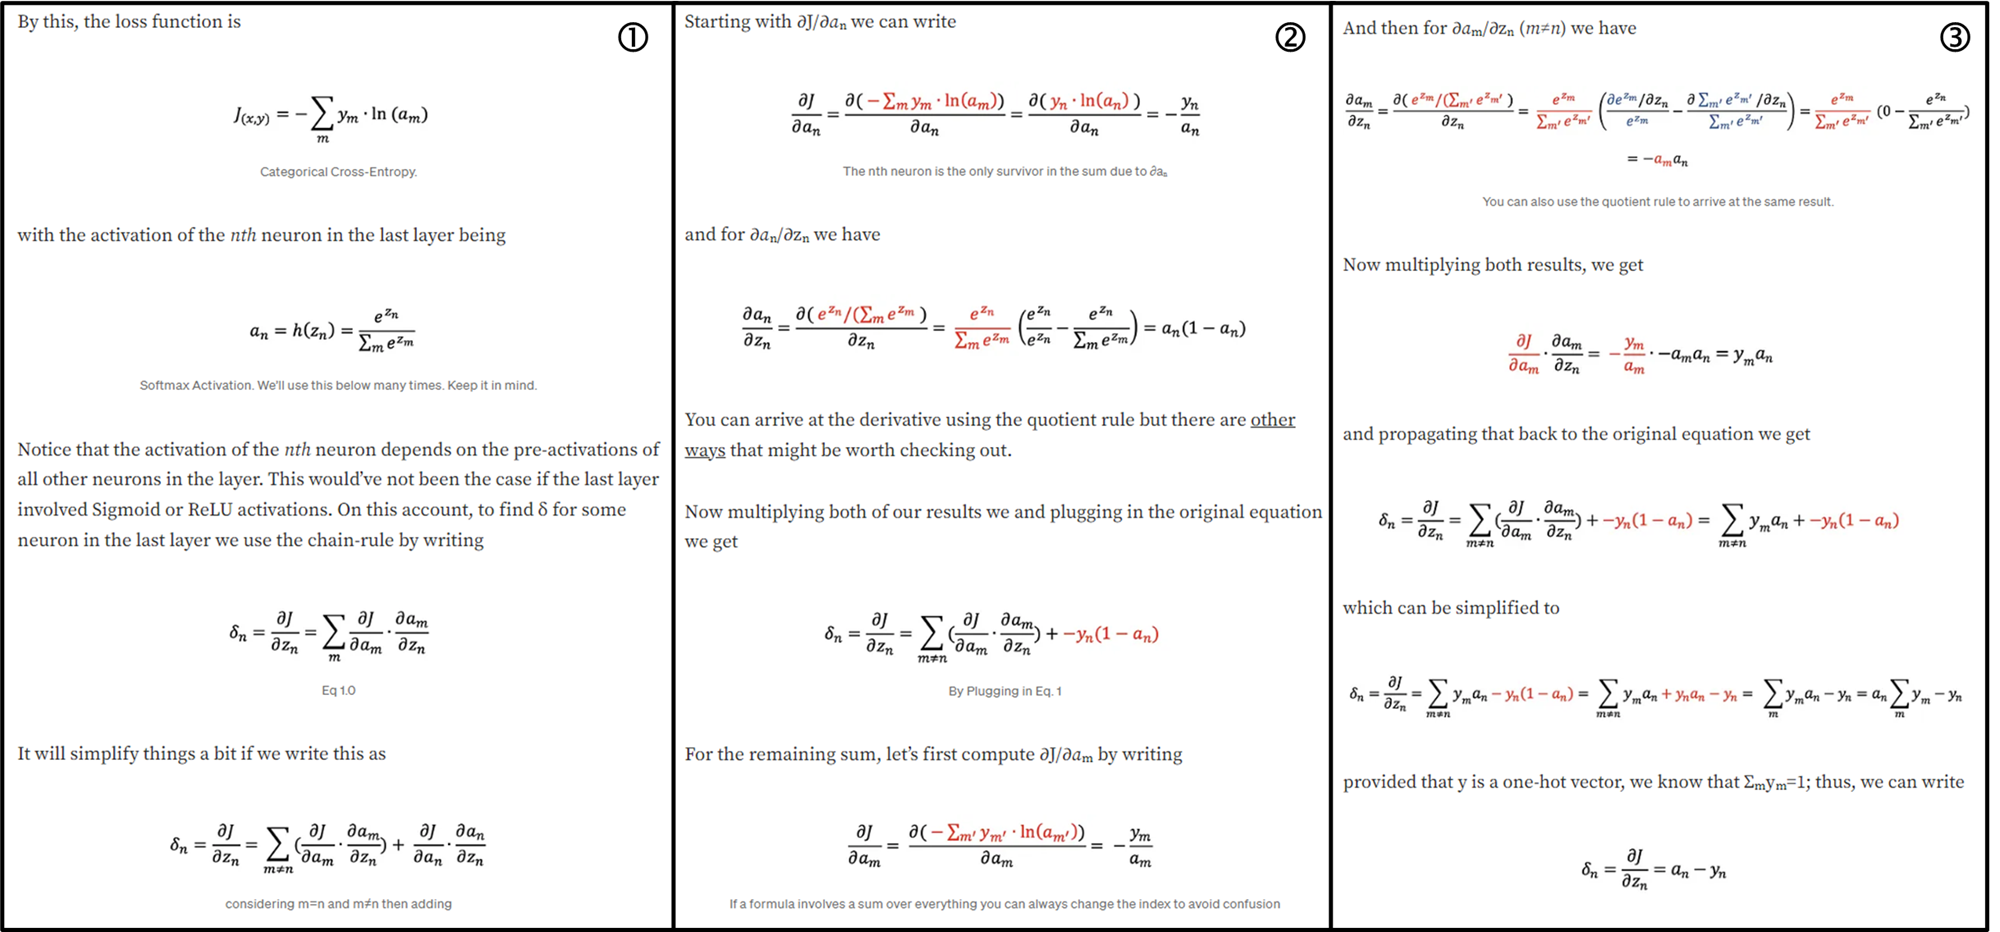
